# Exploratory Data Analysis

mengamati data yang ada

1. melihat data dengan menggunakan head
2. melihat data dengah menggunakan tail
3. melihat data shape
4. melihat semua kolom yang ada pada data
5. melihat data apakah ada yang duplikat atau tidak
6. melihat missing value dari data tersebut, apabila terdapat missing value maka data perlu dibenahi atau tidak

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

df = pd.read_csv('russia_losses_equipment.csv')

In [3]:
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [4]:
df.tail()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
48,2022-04-14,50,160,144,753,1968,366,122,1437,76,134,7,64,25.0,4.0
49,2022-04-15,51,163,144,756,1976,366,122,1443,76,135,8,66,25.0,4.0
50,2022-04-16,52,163,145,762,1982,371,125,1458,76,138,8,66,26.0,4.0
51,2022-04-17,53,165,146,773,2002,376,127,1471,76,148,8,66,27.0,4.0
52,2022-04-18,54,167,147,790,2041,381,130,1487,76,155,8,67,27.0,4.0


In [5]:
df.shape

(53, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   53 non-null     object 
 1   day                    53 non-null     int64  
 2   aircraft               53 non-null     int64  
 3   helicopter             53 non-null     int64  
 4   tank                   53 non-null     int64  
 5   APC                    53 non-null     int64  
 6   field artillery        53 non-null     int64  
 7   MRL                    53 non-null     int64  
 8   military auto          53 non-null     int64  
 9   fuel tank              53 non-null     int64  
 10  drone                  53 non-null     int64  
 11  naval ship             53 non-null     int64  
 12  anti-aircraft warfare  53 non-null     int64  
 13  special equipment      34 non-null     float64
 14  mobile SRBM system     24 non-null     float64
dtypes: float

In [10]:
column_name = df.columns.tolist()
column_name

['date',
 'day',
 'aircraft',
 'helicopter',
 'tank',
 'APC',
 'field artillery',
 'MRL',
 'military auto',
 'fuel tank',
 'drone',
 'naval ship',
 'anti-aircraft warfare',
 'special equipment',
 'mobile SRBM system']

In [11]:
df[df.duplicated()]

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system


In [12]:
df.isnull().sum().reset_index()

,index,0
0,date,0
1,day,0
2,aircraft,0
3,helicopter,0
4,tank,0
5,APC,0
6,field artillery,0
7,MRL,0
8,military auto,0
9,fuel tank,0


## Identifikasi Missing Value 

In [14]:
def chek_missing(df):
    sum_nan = df.isna().sum().reset_index()
    sum_nan.columns = ['kolom', 'jumlah_NaN']
    sum_nan["persentase"] = sum_nan.jumlah_NaN/len(df)*100
    return sum_nan.sort_values("persentase", ascending =  False)
missing = chek_missing(df)

In [15]:
missing

,kolom,jumlah_NaN,persentase
14,mobile SRBM system,29,54.716981
13,special equipment,19,35.849057
0,date,0,0.000000
1,day,0,0.000000
2,aircraft,0,0.000000
3,helicopter,0,0.000000
4,tank,0,0.000000
5,APC,0,0.000000
6,field artillery,0,0.000000
7,MRL,0,0.000000


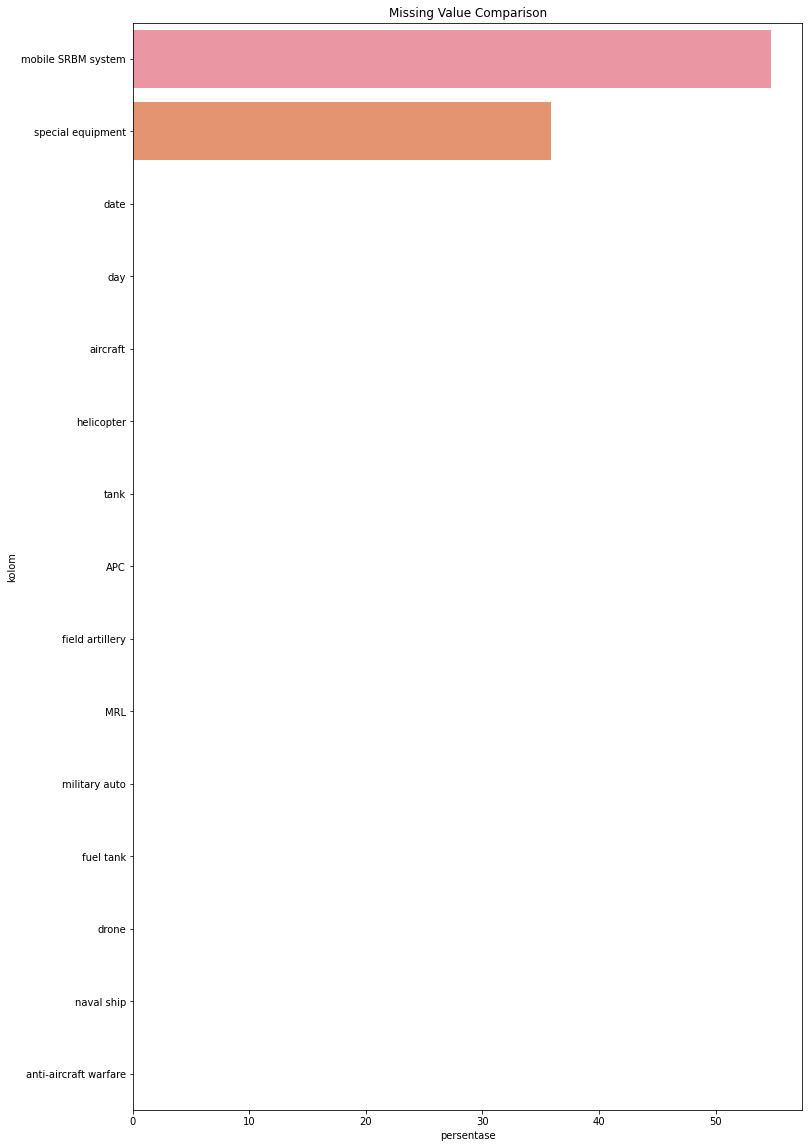

In [16]:
plt.figure(figsize=(12,20))
sns.barplot(y = missing['kolom'], x = missing['persentase']).set_title("Missing Value Comparison");

In [19]:
col_to_fix = missing[missing.persentase > 0].kolom.tolist()
col_to_fix

['mobile SRBM system', 'special equipment']

In [20]:
col_to_fix = df[to_fix_col].describe().columns.tolist()
df[col_to_fix].skew()

mobile SRBM system   -4.898979
special equipment    -0.861725
dtype: float64

In [25]:
df2 = df.drop(missing[missing.persentase > 60].kolom.tolist(),1)
to_fix = df2[df2[to_fix_col].describe().columns.tolist()]
to_fix.skew()
df2

C:\Users\DIMASD~1\AppData\Local\Temp/ipykernel_28376/4138610888.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df2 = df.drop(missing[missing.persentase > 60].kolom.tolist(),1)


,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN
5,2022-03-02,7,30,31,211,862,85,40,355,60,3,2,9,NaN,NaN
6,2022-03-03,8,30,31,217,900,90,42,374,60,3,2,11,NaN,NaN
7,2022-03-04,9,33,37,251,939,105,50,404,60,3,2,18,NaN,NaN
8,2022-03-05,10,39,40,269,945,105,50,409,60,3,2,19,NaN,NaN
9,2022-03-06,11,44,48,285,985,109,50,447,60,4,2,21,NaN,NaN


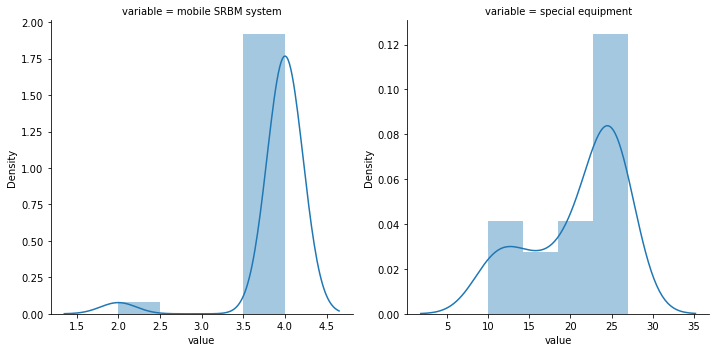

In [26]:
def viz(df,types):
    num = df
    f = pd.melt(num, value_vars=num)
    g = sns.FacetGrid(f, col="variable",  col_wrap=3, 
                      sharex=False, sharey=False, size = 5)
    g = g.map(types, "value")
    plt.show()
    return (g)
import warnings
warnings.filterwarnings('ignore')
viz(to_fix, sns.distplot); 

In [27]:
df2[['mobile SRBM system']] = df2[['mobile SRBM system']].fillna(df2[['mobile SRBM system']].median())
df2['special equipment'] = df2['special equipment'].fillna(df2['special equipment'].mean())

In [28]:
chek2 = chek_missing(df2)
chek2[chek2.kolom.isin(['mobile SRBM system','special equipment'])]

,kolom,jumlah_NaN,persentase
13,special equipment,0,0.0
14,mobile SRBM system,0,0.0


,kolom,jumlah_NaN,persentase
14,mobile SRBM system,29,54.716981
13,special equipment,19,35.849057
0,date,0,0.000000
1,day,0,0.000000
2,aircraft,0,0.000000
3,helicopter,0,0.000000
4,tank,0,0.000000
5,APC,0,0.000000
6,field artillery,0,0.000000
7,MRL,0,0.000000


In [30]:
chek_missing(df2)

,kolom,jumlah_NaN,persentase
0,date,0,0.0
1,day,0,0.0
2,aircraft,0,0.0
3,helicopter,0,0.0
4,tank,0,0.0
5,APC,0,0.0
6,field artillery,0,0.0
7,MRL,0,0.0
8,military auto,0,0.0
9,fuel tank,0,0.0


memisahkan type data numeric dan object

In [32]:
# get column numeric
col_numeric = df2.describe().columns.tolist()
# get column object categorical
col_categoric = df2.describe(include="object").columns.tolist()

In [37]:
df2_numeric = df2[col_numeric]
df2_categoric = df2[col_categoric]

In [38]:
df2_numeric

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2,10,7,80,516,49,4,100,60,0,2,0,20.823529,4.0
1,3,27,26,146,706,49,4,130,60,2,2,0,20.823529,4.0
2,4,27,26,150,706,50,4,130,60,2,2,0,20.823529,4.0
3,5,29,29,150,816,74,21,291,60,3,2,5,20.823529,4.0
4,6,29,29,198,846,77,24,305,60,3,2,7,20.823529,4.0
5,7,30,31,211,862,85,40,355,60,3,2,9,20.823529,4.0
6,8,30,31,217,900,90,42,374,60,3,2,11,20.823529,4.0
7,9,33,37,251,939,105,50,404,60,3,2,18,20.823529,4.0
8,10,39,40,269,945,105,50,409,60,3,2,19,20.823529,4.0
9,11,44,48,285,985,109,50,447,60,4,2,21,20.823529,4.0


In [39]:
df2_categoric

,date
0,2022-02-25
1,2022-02-26
2,2022-02-27
3,2022-02-28
4,2022-03-01
5,2022-03-02
6,2022-03-03
7,2022-03-04
8,2022-03-05
9,2022-03-06
